In [83]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris

def regulation(x):
    return (x-x.mean())/x.std()

iris = load_iris()
data = iris.data
y = iris.target

sepal_length =data[:,0]
sepal_width=data[:,1]
petal_length=data[:,2]
petal_width=data[:,3]

#正则化数据
rsepal_length=regulation(sepal_length)
rsepal_width=regulation(sepal_width)
rpetal_length=regulation(petal_length)
reptal_width=regulation(petal_width)

#将数据转换为矩阵的形式
X=np.mat([rpetal_length,reptal_width,np.ones(len(petal_length))]).T
y = np.mat(y).T


#theta，迭代次数，学习率
theta1 = [0.1,0.1,0.1]
theta2=[0.1,0.1,0.1]
times = 500
lr=0.001

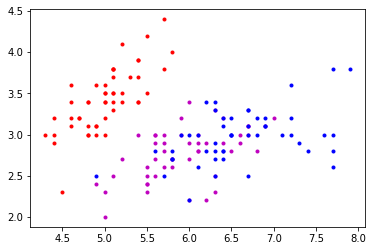

In [84]:
#依据sepal分类时，可视化图像
plt.plot(sepal_length[:49],sepal_width[:49],"r.")
plt.plot(sepal_length[50:99],sepal_width[50:99],"m.")
plt.plot(sepal_length[100:],sepal_width[100:],"b.")

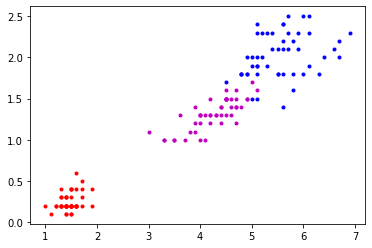

In [107]:
#依据petal分类，很明显，根据sepal进行分类更合理
plt.plot(petal_length[:49],petal_witdh[:49],"r.")
plt.plot(petal_length[50:99],petal_witdh[50:99],"m.")
plt.plot(petal_length[100:],petal_witdh[100:],"b.")

In [95]:

def sigmoid(x,theta):
    return 1.0/(1+np.exp(-1.0*x*np.mat(theta).T)[0,0])

#梯度下降，返回theta和loss
def grad(X,y,theta,times,lr):
    m = X.shape[0]
    n = X.shape[1]
    loss=[]
    for j in range(times):
        sum=[0,0,0]
        for i  in range(m):
            sum[0] += (sigmoid(X[i],theta)-y[i,0])*X[i,0]
            sum[1] +=(sigmoid(X[i],theta)-y[i,0])*X[i,1]
            sum[2] +=(sigmoid(X[i],theta)-y[i,0])*X[i,2]
        
        
        for i in range(n):
            theta[i] -= lr*sum[i]/m
        loss +=[compute_loss(X,y,theta)]
    return theta,loss
 
#计算损失值
def compute_loss(X,y,theta):
    sum =0
    n = X.shape[0]
    for i in range(n):
       # print(sum)
        sum+=y[i,0]*np.log(sigmoid(X[i],theta))+(y-y[i,0])*np.log(1-sigmoid(X[i],theta))
    return sum/n*(-1)

In [116]:
#通过两次二分类来将数据分成三类
y[50:]=1
y[0:49]=0
theta1,loss1 = grad(X,y,theta1,times,lr)

y[100:]=1
y[50:99]=0
theta2,loss2 = grad(X[50:],y[50:],theta2,times,lr)


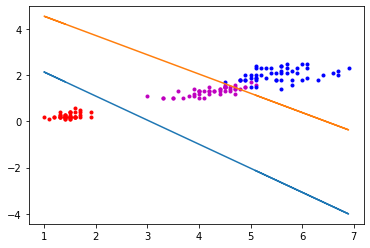

In [117]:
plt.plot(petal_length[:49],petal_witdh[:49],"r.")
plt.plot(petal_length[50:99],petal_witdh[50:99],"m.")
plt.plot(petal_length[100:],petal_witdh[100:],"b.")

plt.plot(petal_length,-theta1[0]/theta1[1]*petal_length-theta1[2]/theta1[1]+petal_length.mean()+reptal_width.mean())
plt.plot(petal_length,-theta2[0]/theta2[1]*petal_length-theta2[2]/theta2[1]+petal_length[50:].mean()+reptal_width[50:].mean())
